In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set_style("whitegrid")


#한글 시각화
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [28]:
train

,교차로명,cctv,sign,speed,peek_speed,car,bus,truck,type,school,roundabout,accident,person,위도,경도
0,가덕지구대3,0,0,58.72,49.65,1587,36,419,3지,0,0,0,0,36.561536,127.541219
1,가마육교4,0,0,29.60,19.05,9683,110,1618,4지,0,0,4,7,36.596090,127.471779
2,강내월곡4,0,0,56.98,48.99,2610,113,1179,4지,0,0,6,13,36.624493,127.369452
3,강내탑연3,0,0,56.98,48.99,2610,113,1179,3지,0,0,4,5,36.623910,127.358570
4,강외서평3,0,0,35.29,15.31,14712,222,3193,3지,0,0,2,4,36.605214,127.309905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,북이회전교차로,0,0,35.49,15.67,10146,142,2067,4지,0,1,0,0,36.738338,127.541500
74,상당산성회전교차로,0,0,61.59,27.01,13487,373,4467,4지,0,1,1,1,36.653992,127.541800
75,가덕상야한계회전교차로,0,0,58.72,49.65,1587,36,419,3지,0,1,0,0,36.594886,127.564900
76,남이팔봉삼거리회전교차로,0,0,29.60,19.05,9683,110,1618,3지,0,1,0,0,36.567101,127.409100


In [11]:
train = pd.read_csv('C:/Users/병현/Downloads/train (2).csv' , engine = 'python')

train.loc[train['cctv'] ==2 ,'cctv'] = 1
train.loc[train['cctv'] ==3 ,'cctv'] = 1

#cctv를 binary로 변환
train.head()

,교차로명,cctv,sign,speed,peek_speed,car,bus,truck,type,school,roundabout,accident,person,위도,경도
0,가덕지구대3,0,0,58.72,49.65,1587,36,419,3지,0,0,0,0,36.561536,127.541219
1,가마육교4,0,0,29.60,19.05,9683,110,1618,4지,0,0,4,7,36.596090,127.471779
2,강내월곡4,0,0,56.98,48.99,2610,113,1179,4지,0,0,6,13,36.624493,127.369452
3,강내탑연3,0,0,56.98,48.99,2610,113,1179,3지,0,0,4,5,36.623910,127.358570
4,강외서평3,0,0,35.29,15.31,14712,222,3193,3지,0,0,2,4,36.605214,127.309905


# 스쿨존 여부

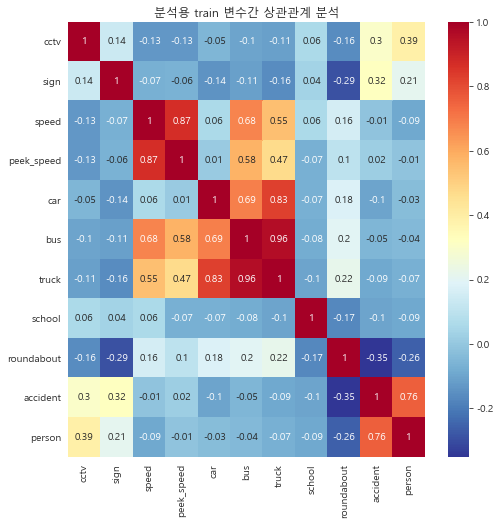

In [31]:
plt.figure(figsize = (8,8))
plt.title('분석용 train 변수간 상관관계 분석')
sns.heatmap(np.round(train.drop(['위도','경도'], axis = 1).corr(),2), cmap = plt.cm.RdYlBu_r, annot=True)



# 변수별 사고에 영향 변수 파악 위한 EDA 
- 변수별 가중치 고려하기 위해 했다고 덧붙일 수 있을듯

##### boxplot function

In [17]:
def boxplot_(df , title = 'title을 입력' , axvline=2.5):

    plt.figure(figsize = (12,4))

    #medianprops = dict(linestyle='-', color = 'red',linewidth=5)
    plt.title(title)
    df.boxplot(color={'medians': 'red'},
                         medianprops = {'linewidth':'3'})
    plt.axvline(axvline , ls = '--' , color = 'purple')
    plt.show()

# type (교차로 유형)

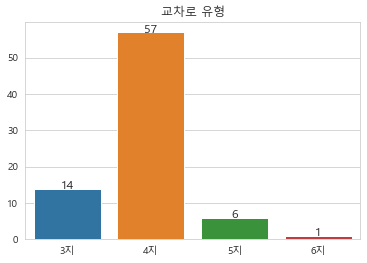

In [18]:
ax = sns.barplot( x= (train['type'].value_counts().sort_index()).index , 
             y= (train['type'].value_counts().sort_index()).values)

plt.title('교차로 유형')
for p in ax.patches:

    height = p.get_height()

    ax.text(x = p.get_x()+p.get_width()/2., 
            y = height,
            s = int(np.round(height,1))
            ,ha="center",fontsize=12)

In [19]:
df_concat = pd.concat([train[train['type'] == '3지'][['accident','person']], 
           train[train['type'] == '4지'][['accident','person']] ,
          train[(train['type'] == '5지') | (train['type'] == '6지')][['accident','person']]],
          axis = 1)

df_concat.columns = ['3지 사고건수', '3지 사상자',
             '4지 사고건수', '4지 사상자',
              '5지6지 사고건수',' 5지6지 사상자']

df_concat

,3지 사고건수,3지 사상자,4지 사고건수,4지 사상자,5지6지 사고건수,5지6지 사상자
0,0.0,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,4.0,7.0,NaN,NaN
2,NaN,NaN,6.0,13.0,NaN,NaN
3,4.0,5.0,NaN,NaN,NaN,NaN
4,2.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
73,NaN,NaN,0.0,0.0,NaN,NaN
74,NaN,NaN,1.0,1.0,NaN,NaN
75,0.0,0.0,NaN,NaN,NaN,NaN
76,0.0,0.0,NaN,NaN,NaN,NaN


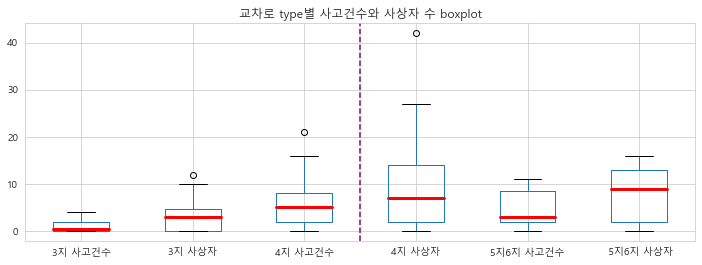

In [20]:
boxplot_(df = df_concat , title = '교차로 type별 사고건수와 사상자 수 boxplot' , axvline = 3.5)

# school

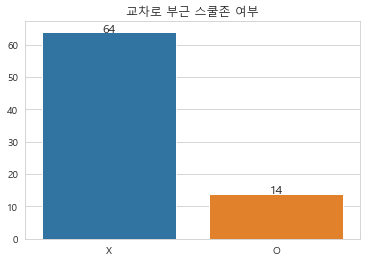

In [21]:
ax = sns.barplot( x= (train['school'].value_counts().sort_index()).index , 
             y= (train['school'].value_counts().sort_index()).values)

plt.title('교차로 부근 스쿨존 여부')
plt.xticks(np.arange(2), ['X','O'])

for p in ax.patches:

    height = p.get_height()

    ax.text(x = p.get_x()+p.get_width()/2., 
            y = height,
            s = int(np.round(height,1))
            ,ha="center",fontsize=12)

In [22]:
school_merge = pd.concat([train[train['school']==0][['accident','person']] , train[train['school']==1][['accident','person']]], axis = 1)
school_merge.columns = ['스쿨존X 사고건수', '스쿨존X 사상자수' ,'스쿨존O 사고건수' ,'스쿨존O 사상자수']
school_merge = school_merge.iloc[:,[0,2,1,3]]

school_merge.head()

,스쿨존X 사고건수,스쿨존O 사고건수,스쿨존X 사상자수,스쿨존O 사상자수
0,0.0,NaN,0.0,NaN
1,4.0,NaN,7.0,NaN
2,6.0,NaN,13.0,NaN
3,4.0,NaN,5.0,NaN
4,2.0,NaN,4.0,NaN


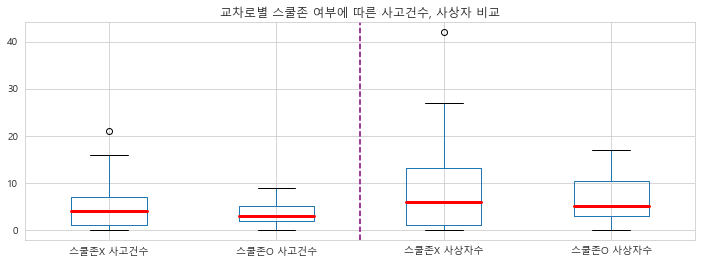

In [23]:
boxplot_(df = school_merge , title = '교차로별 스쿨존 여부에 따른 사고건수, 사상자 비교')

>- 스쿨존부근의 교차로는 사고건수가 비교적 적음을 볼 수 있다.

# CCTV

In [24]:
cctv_merge = pd.concat([train[train['cctv']==0][['accident','person']] , train[train['cctv']==1][['accident','person']]], axis = 1)
cctv_merge.columns = ['CCTV 없는 교차로 사고건수',
                       'CCTV 없는 교차로 사상자수',
                       'CCTV 있는 교차로 사고건수',
                       'CCTV 있는 교차로 사상자수']
cctv_merge = cctv_merge.iloc[:,[0,2,1,3]]

cctv_merge.head()

,CCTV 없는 교차로 사고건수,CCTV 있는 교차로 사고건수,CCTV 없는 교차로 사상자수,CCTV 있는 교차로 사상자수
0,0.0,NaN,0.0,NaN
1,4.0,NaN,7.0,NaN
2,6.0,NaN,13.0,NaN
3,4.0,NaN,5.0,NaN
4,2.0,NaN,4.0,NaN


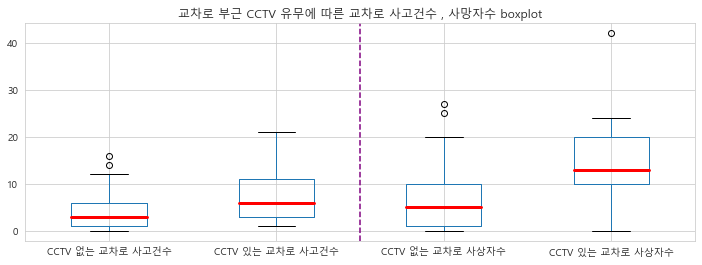

In [25]:
boxplot_(cctv_merge, title = '교차로 부근 CCTV 유무에 따른 교차로 사고건수 , 사망자수 boxplot')

>- CCTV가 있는곳이 오히려 더 사고건수가 많다?
>- 원인은 모르지만 , 상관계수만 봐도 알수 있듯이 , CCTV있는교차로가 비교적 사고 많음

##### Roundabout

In [26]:
roundabout_merge = pd.concat([train[train['roundabout']==0][['accident','person']] , train[train['roundabout']==1][['accident','person']]], axis = 1)
roundabout_merge.columns = ['roundabout 없는 교차로 사고건수',
                       'roundabout 없는 교차로 사상자수',
                       'roundabout 있는 교차로 사고건수',
                       'roundabout 있는 교차로 사상자수']
roundabout_merge = roundabout_merge.iloc[:,[0,2,1,3]]

roundabout_merge.head()

,roundabout 없는 교차로 사고건수,roundabout 있는 교차로 사고건수,roundabout 없는 교차로 사상자수,roundabout 있는 교차로 사상자수
0,0.0,NaN,0.0,NaN
1,4.0,NaN,7.0,NaN
2,6.0,NaN,13.0,NaN
3,4.0,NaN,5.0,NaN
4,2.0,NaN,4.0,NaN


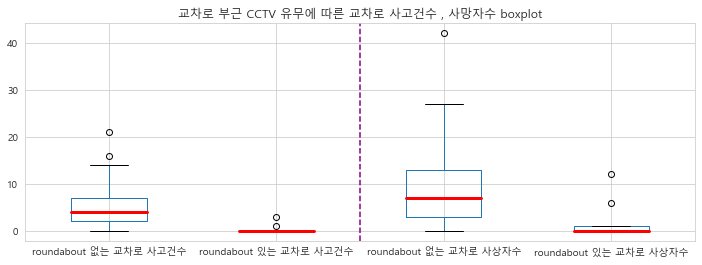

In [27]:
boxplot_(roundabout_merge, title = '교차로 부근 CCTV 유무에 따른 교차로 사고건수 , 사망자수 boxplot')

가. 분석 데이터 목록	O
나. 분석 데이터 제공기관	OO
다. 데이터 상세 설명